In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from functools import reduce
from tabulate import tabulate
from operator import itemgetter, attrgetter
import graphviz
import pygraphviz as pgv

In [2]:
### Load data
#directory path; change this
input_dir = "C:/Users/Geraldine Desktop/OneDrive - Loyola University Chicago/Documents/PKH22/trial/aging_pathway"

Try microglia network (10/6/22)

In [3]:
#load network data
data2 = pd.read_csv(input_dir + "/" + 'networkMicroglia_edit.txt', sep="\t", header=None) 
arr_data = data2.to_numpy()
arr_data[0:,1] = np.where(arr_data[0:,1]=='up-regulates',1,-1)
#create list of 3-tuple edges from network data 
network = [(arr_data[i,0], arr_data[i,2], {'interaction':arr_data[i,1]}) for i in range(len(data2))]
#Create directional graph using network  
M = nx.DiGraph(network)

In [4]:
# convert to pgv graph
MA = nx.nx_agraph.to_agraph(M)

In [5]:
for u,v in MA.edges():
    z = MA.get_edge(u,v)
    #y = z.attr["interaction"]
    #print(z)
    #print(y, z)
    if z.attr["interaction"] == '-1':
        z.attr["color"] = 'red'
        z.attr["arrowhead"] ="tee"
    else:
        z.attr["color"] = 'black'

In [6]:
def color_arrow(network):
    for u,v in network.edges():
        z = network.get_edge(u,v)
        if z.attr["interaction"] == '-1':
            z.attr["color"] = 'red'
            z.attr["arrowhead"] ="tee"
        else:
            z.attr["color"] = 'black'
    return network

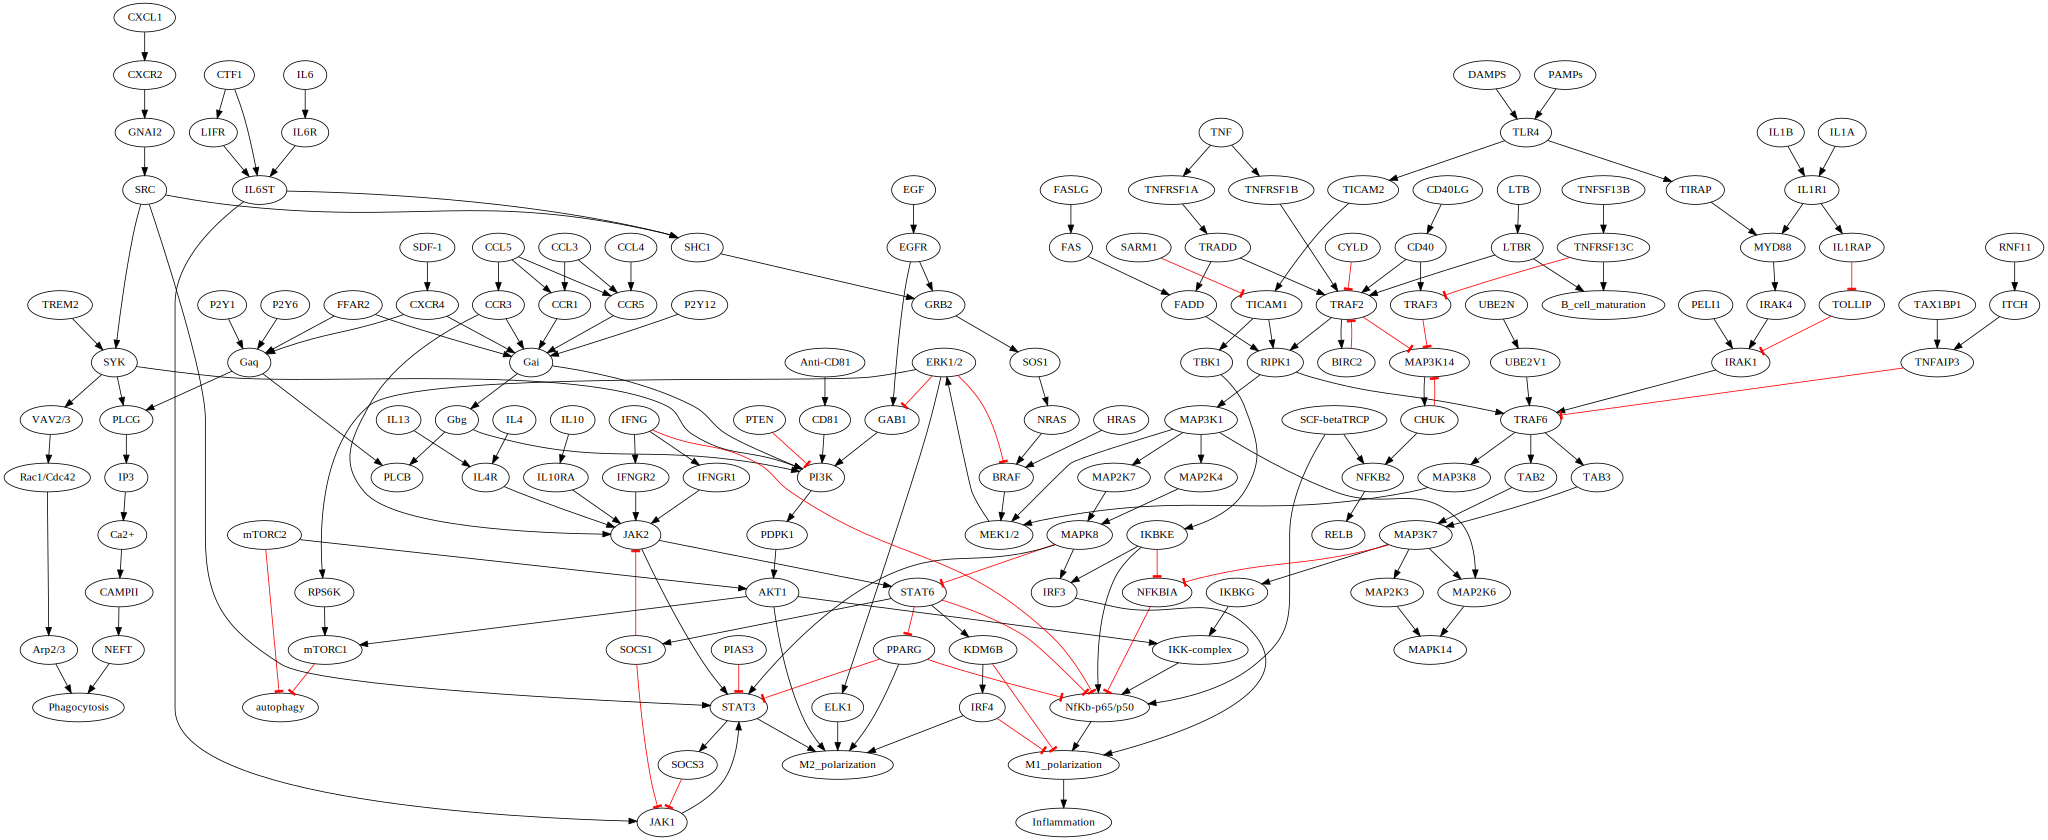

In [33]:
MA.layout('dot')
MA

In [86]:
# make an image file
#MA.draw('MA3.png')

In [7]:
# list proteins of interest to find in the main netowk
sublist = ['PI3K', 'PDPK1', 'AKT1', 'P2Y12', 'Phagocytosis', 'P2Y6', 'TREM2', 'mTORC2', 'PTEN']
# depth-first search in networkx graph; this will return only the edges (i.e. 2-pair tuple) w/ no 'interaction' data
sub_M = nx.DiGraph(list(nx.edge_dfs(M, sublist)))

In [8]:
# get the subraph from the agraph; this way, other info like 'interaction' is also taken as subgraph
asub =  MA.subgraph(sub_M)

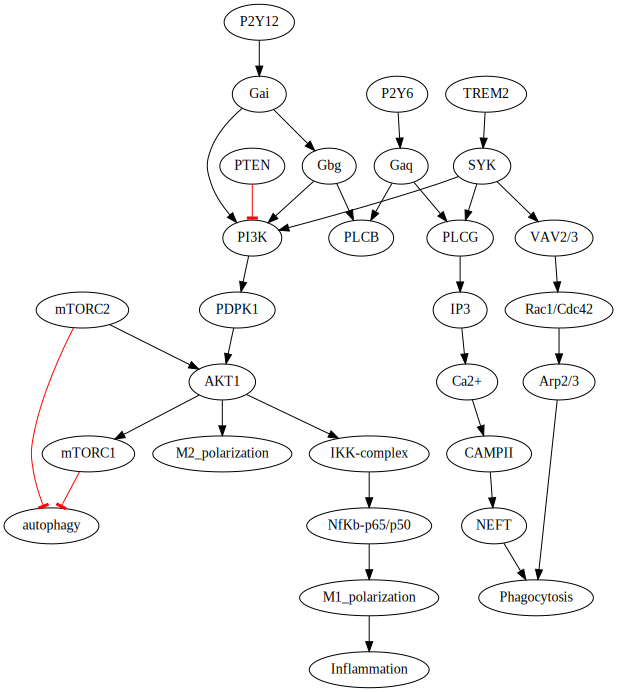

In [9]:
asub.layout('dot')
asub

In [40]:
#print(asub.string())

strict digraph {
	graph [bb="0,0,639.54,684"];
	node [label="\N"];
	Gai	[height=0.5,
		pos="308.54,594",
		width=0.75];
	PI3K	[height=0.5,
		pos="301.54,450",
		width=0.81243];
	Gai -> PI3K	[color=black,
		interaction=1,
		pos="e,285.54,465.52 290.93,579.86 279.59,570.25 265.85,556.1 259.54,540 253.71,525.1 254.28,519.11 259.54,504 263.5,492.63 271.04,481.86 \
\
278.64,473.03"];
	Gbg	[height=0.5,
		pos="379.54,522",
		width=0.75];
	Gai -> Gbg	[color=black,
		interaction=1,
		pos="e,364.85,537.49 323.26,578.5 333.16,568.73 346.39,555.69 357.53,544.7"];
	PDPK1	[height=0.5,
		pos="293.54,378",
		width=1.0471];
	PI3K -> PDPK1	[color=black,
		interaction=1,
		pos="e,295.5,396.1 299.57,431.7 298.68,423.98 297.63,414.71 296.64,406.11"];
	Gbg -> PI3K	[color=black,
		interaction=1,
		pos="e,317.46,465.28 364.13,507.17 352.96,497.14 337.64,483.39 324.95,472.01"];
	PLCB	[height=0.5,
		pos="395.54,450",
		width=0.90278];
	Gbg -> PLCB	[color=black,
		interaction=1,
		pos="e,391.6,468.28 383.42,504.

In [10]:
#make a copy of asub to try to edit the subgraph
bsub =  MA.subgraph(sub_M)

In [11]:
bsub.remove_node("M2_polarization")

In [12]:
bsub.remove_edge("Gaq", "PLCB")

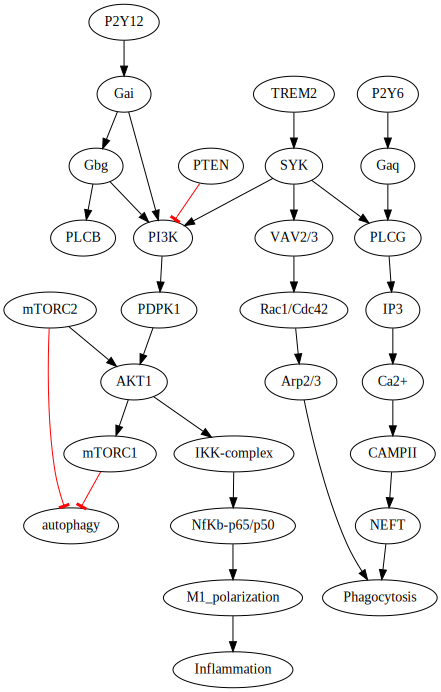

In [13]:
bsub.layout('dot')
bsub

In [25]:
#print(bsub.string())

strict digraph {
	graph [bb="0,0,517.79,684"];
	node [label="\N"];
	Gai	[fillcolor=lightblue,
		height=0.5,
		pos="207.54,594",
		style=filled,
		width=0.75];
	PI3K	[fillcolor=lightblue,
		height=0.5,
		pos="216.54,450",
		style=filled,
		width=0.81243];
	Gai -> PI3K	[color=black,
		interaction=1,
		pos="e,231.8,465.66 225.16,579.86 236.49,570.25 250.24,556.1 256.54,540 262.38,525.1 261.63,519.17 256.54,504 252.79,492.79 245.62,482.05 \
\
238.37,473.21"];
	Gbg	[height=0.5,
		pos="137.54,522",
		width=0.75];
	Gai -> Gbg	[color=black,
		interaction=1,
		pos="e,152.03,537.49 193.04,578.5 183.28,568.73 170.23,555.69 159.24,544.7"];
	PDPK1	[fillcolor=lightblue,
		height=0.5,
		pos="165.54,378",
		style=filled,
		width=1.0471];
	PI3K -> PDPK1	[color=black,
		interaction=1,
		pos="e,177.42,395.31 204.97,433.12 198.61,424.38 190.57,413.35 183.42,403.54"];
	Gbg -> PI3K	[color=black,
		interaction=1,
		pos="e,200.43,465.28 153.15,507.17 164.47,497.14 179.99,483.39 192.83,472.01"];
	PLCB	[height=

In [14]:
# color pathway w/ ca involved
ca = ['PLCG', 'IP3', 'Ca2+', 'CAMPII', 'P2Y12', 'Gai', 'PI3K', 'PDPK1', 'AKT1', 'P2Y6', 'Gaq', 'PTEN']
for c in ca:
    bsub.add_node(c, style='filled', fillcolor="lightblue")

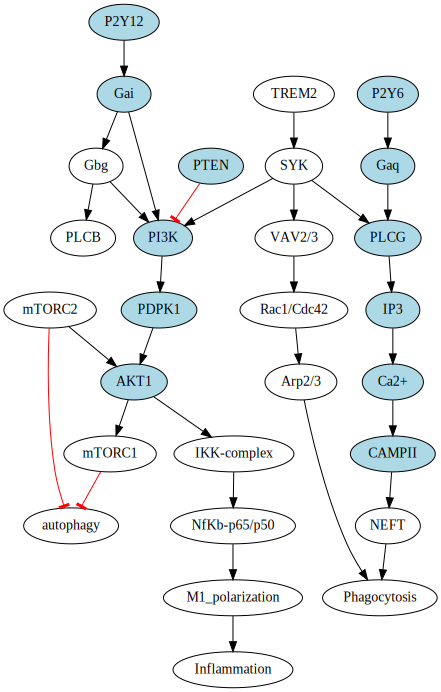

In [15]:
bsub

In [16]:
# create a png file
bsub.draw('ca_sub.png')